In [1]:
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
import numpy as np
from sklearn.cluster import KMeans
import os, shutil, glob, os.path
from PIL import Image as pil_image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
image.LOAD_TRUNCATED_IMAGES = True 
model = VGG19(weights='imagenet', include_top=False)
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [3]:
imdir = 'A:\School\Mat 397\Smeltzer STEM\TEM'
targetdir = 'A:\School\Mat 397\Smeltzer STEM\TEM\Tem Sorted\Tem Sorted'
number_clusters = 5

In [4]:
filelist = glob.glob(os.path.join(imdir, '*.png'))
filelist.sort()
featurelist = []
for i, imagepath in enumerate(filelist):
    print("    Status: %s / %s" %(i, len(filelist)), end="\r")
    img = image.load_img(imagepath, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = np.array(model.predict(img_data))
    featurelist.append(features.flatten())

In [5]:
kmeans = KMeans(n_clusters=number_clusters, random_state=0).fit(np.array(featurelist))

In [6]:
try:
    os.makedirs(targetdir)
except OSError:
    pass

In [7]:
print("\n")
for i, m in enumerate(kmeans.labels_):
    print("    Copy: %s / %s" %(i, len(kmeans.labels_)), end="\r")
    shutil.copy(filelist[i], 'A:\School\Mat 397\Smeltzer STEM\TEM\Tem Sorted\Tem Sorted' + str(m) + "_" + str(i) + ".png")

In [8]:
y_km=kmeans.fit_predict

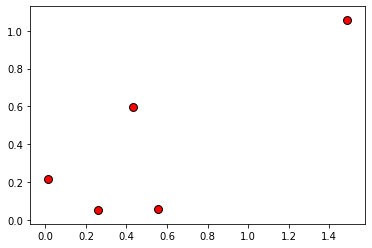

In [9]:
plt.scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,4],
    s=250, marker='.',
    c='red', edgecolor='black',
    label='centroids'
)

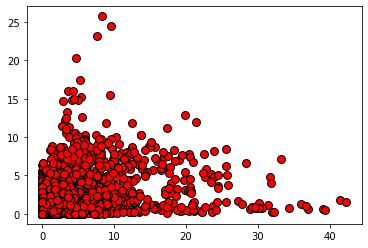

In [126]:
plt.scatter(
    kmeans.cluster_centers_[0], kmeans.cluster_centers_[4],
    s=250, marker='.',
    c='red', edgecolor='black',
    label='centroids'
)

In [95]:
kmeans.labels_

array([3, 0, 3, ..., 2, 0, 2])